## Running k-means on Airbnb Amsterdam data

## Importing libraries required

In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
pathk=r'/Users/keerthiputti/Desktop/Achievment 6/Airbnb Amsterdam/02 Data/Prepared Data'

In [3]:
df =pd.read_csv(os.path.join(pathk, 'Listing_calendar_data_details.csv'),index_col=False)

In [7]:
df.columns

Index(['Listing_id', 'Date', 'Availability', 'Price_cal', 'Place_name',
       'Host_id', 'neighbourhood', 'latitude', 'longitude', 'Room_type',
       'Price_list', 'Min_nights', 'N_reviews', 'Host_list_count',
       'Availability_365', 'N.People', 'Bathrooms', 'Bedrooms', 'Rating_100',
       '_merge'],
      dtype='object')

In [18]:
df[df['Price_list']>4000]

,Listing_id,Date,Availability,Price_cal,Place_name,Host_id,neighbourhood,latitude,longitude,Room_type,...,Min_nights,N_reviews,Host_list_count,Availability_365,N.People,Bathrooms,Bedrooms,Rating_100,_merge,clusters
2920,258273,2019-10-09,t,8000.0,Great CENTRAL apartment De Pijp,1358307,De Pijp - Rivierenbuurt,52.354200,4.891596,Entire home/apt,...,30,8,1,364,4,1.0,1.0,72.0,both,1
2921,258273,2019-10-08,t,8000.0,Great CENTRAL apartment De Pijp,1358307,De Pijp - Rivierenbuurt,52.354200,4.891596,Entire home/apt,...,30,8,1,364,4,1.0,1.0,72.0,both,1
2922,258273,2019-10-07,t,8000.0,Great CENTRAL apartment De Pijp,1358307,De Pijp - Rivierenbuurt,52.354200,4.891596,Entire home/apt,...,30,8,1,364,4,1.0,1.0,72.0,both,1
2923,258273,2019-10-06,t,8000.0,Great CENTRAL apartment De Pijp,1358307,De Pijp - Rivierenbuurt,52.354200,4.891596,Entire home/apt,...,30,8,1,364,4,1.0,1.0,72.0,both,1
2924,258273,2019-10-05,t,8000.0,Great CENTRAL apartment De Pijp,1358307,De Pijp - Rivierenbuurt,52.354200,4.891596,Entire home/apt,...,30,8,1,364,4,1.0,1.0,72.0,both,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7097785,29926643,2018-12-10,f,NaN,Lovely place,225007426,Centrum-West,52.382054,4.883831,Entire home/apt,...,3,3,1,0,2,1.0,0.0,100.0,both,1
7097786,29926643,2018-12-09,f,NaN,Lovely place,225007426,Centrum-West,52.382054,4.883831,Entire home/apt,...,3,3,1,0,2,1.0,0.0,100.0,both,1
7097787,29926643,2018-12-08,f,NaN,Lovely place,225007426,Centrum-West,52.382054,4.883831,Entire home/apt,...,3,3,1,0,2,1.0,0.0,100.0,both,1
7097788,29926643,2018-12-07,f,NaN,Lovely place,225007426,Centrum-West,52.382054,4.883831,Entire home/apt,...,3,3,1,0,2,1.0,0.0,100.0,both,1


In [19]:
df=df[df['Price_list']<4000]

## Elbow technique

In [20]:
df_clust=df[['Price_list', 'Min_nights', 'N_reviews', 'Host_list_count',
       'Availability_365', 'N.People', 'Bathrooms', 'Bedrooms', 'Rating_100']]

In [24]:
num_cl = range(1, 12) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [25]:
score = [kmeans[i].fit(df_clust).score(df_clust) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-187999534213.09256,
 -117739737314.70744,
 -88204910567.35054,
 -72639545528.61517,
 -60949481004.86932,
 -54181718438.998276,
 -48425555397.14543,
 -43146849696.97072,
 -38834294096.47044,
 -34946227912.18414,
 -32057134521.292976]

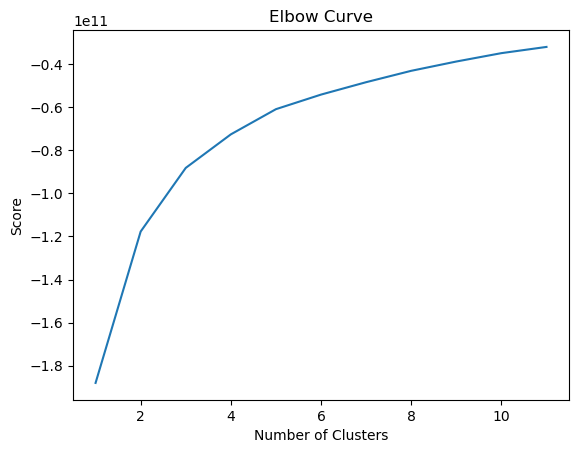

In [26]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I tried 10 and 12 clusters and felt 5 would be a good number of clusters.

In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5)

In [28]:
# Fit the k-means object to the data.

kmeans.fit(df_clust)

KMeans(n_clusters=5)

In [29]:
# adding the predicyion on to the main data frame

df['clusters'] = kmeans.fit_predict(df_clust)

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_4536/410072995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df_clust)


In [30]:
df.head()

,Listing_id,Date,Availability,Price_cal,Place_name,Host_id,neighbourhood,latitude,longitude,Room_type,...,Min_nights,N_reviews,Host_list_count,Availability_365,N.People,Bathrooms,Bedrooms,Rating_100,_merge,clusters
0,2818,2019-12-05,f,61.954545,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,...,3,248,1,44,2,1.5,1.0,97.0,both,3
1,2818,2019-12-04,f,61.954545,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,...,3,248,1,44,2,1.5,1.0,97.0,both,3
2,2818,2019-12-03,f,61.954545,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,...,3,248,1,44,2,1.5,1.0,97.0,both,3
3,2818,2019-12-02,f,61.954545,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,...,3,248,1,44,2,1.5,1.0,97.0,both,3
4,2818,2019-12-01,f,61.954545,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,...,3,248,1,44,2,1.5,1.0,97.0,both,3


In [31]:
df['clusters'].value_counts()

3    4539870
0    1489565
1    1090985
4     164250
2       2920
Name: clusters, dtype: int64

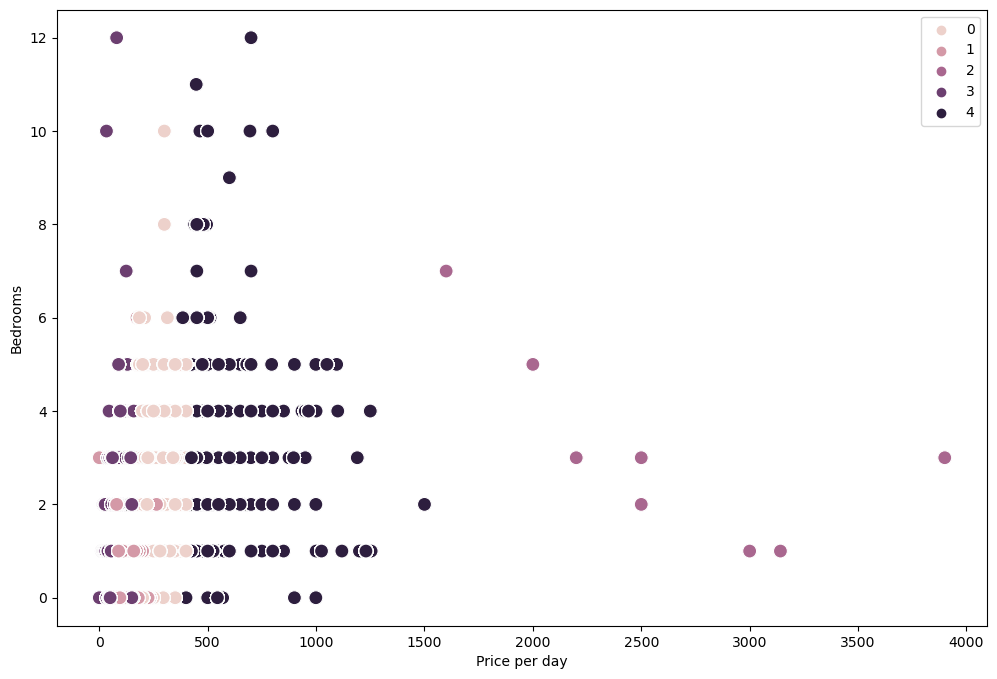

In [32]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Price_list'], y=df['Bedrooms'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price per day') # Label x-axis.
plt.ylabel('Bedrooms') # Label y-axis.
plt.show()

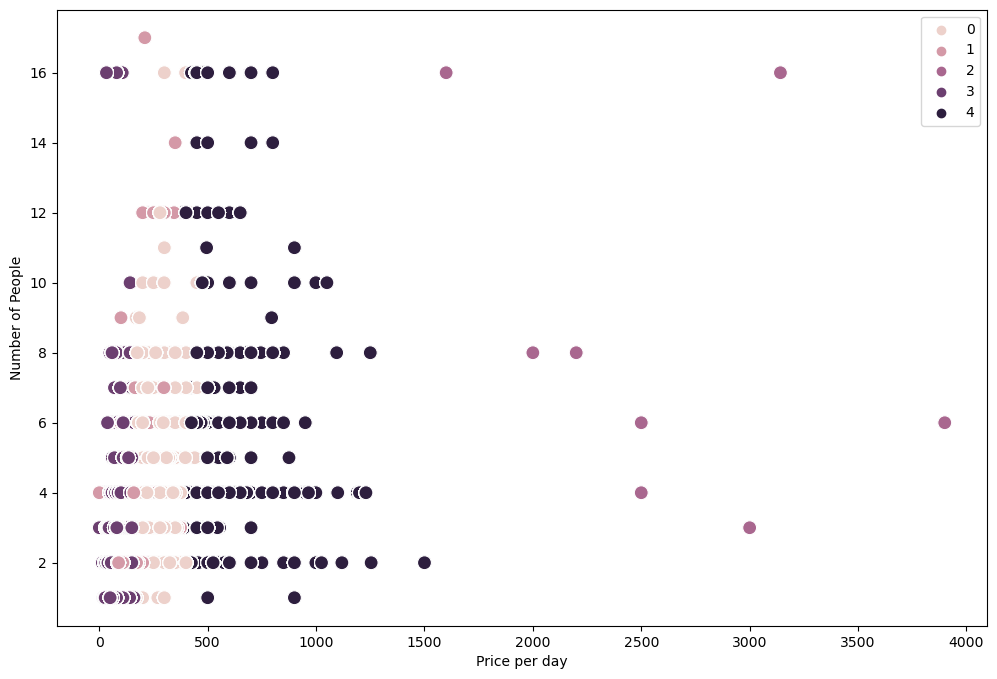

In [33]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Price_list'], y=df['N.People'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Number of People') 
plt.show()

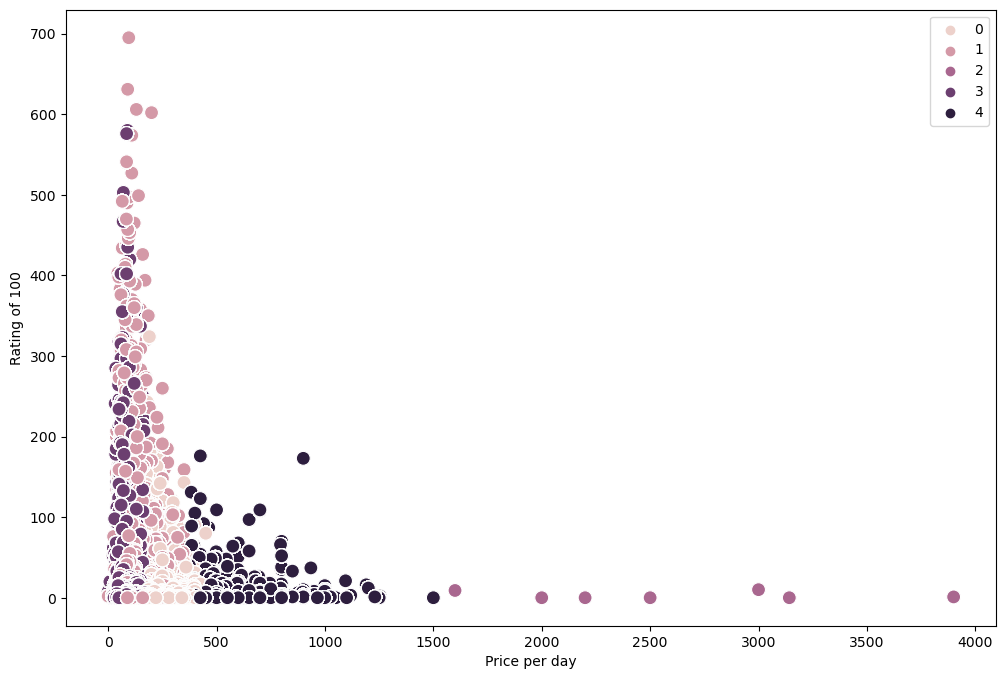

In [40]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Price_list'], y=df['N_reviews'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Rating of 100') 
plt.show()

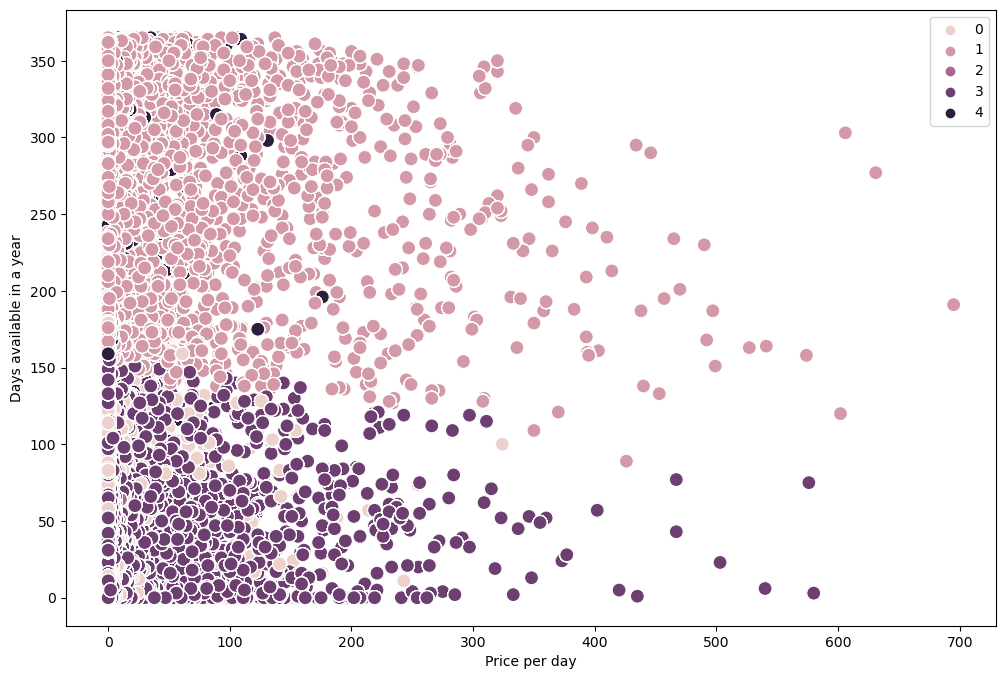

In [44]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['N_reviews'], y=df['Availability_365'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Days available in a year') 
plt.show()

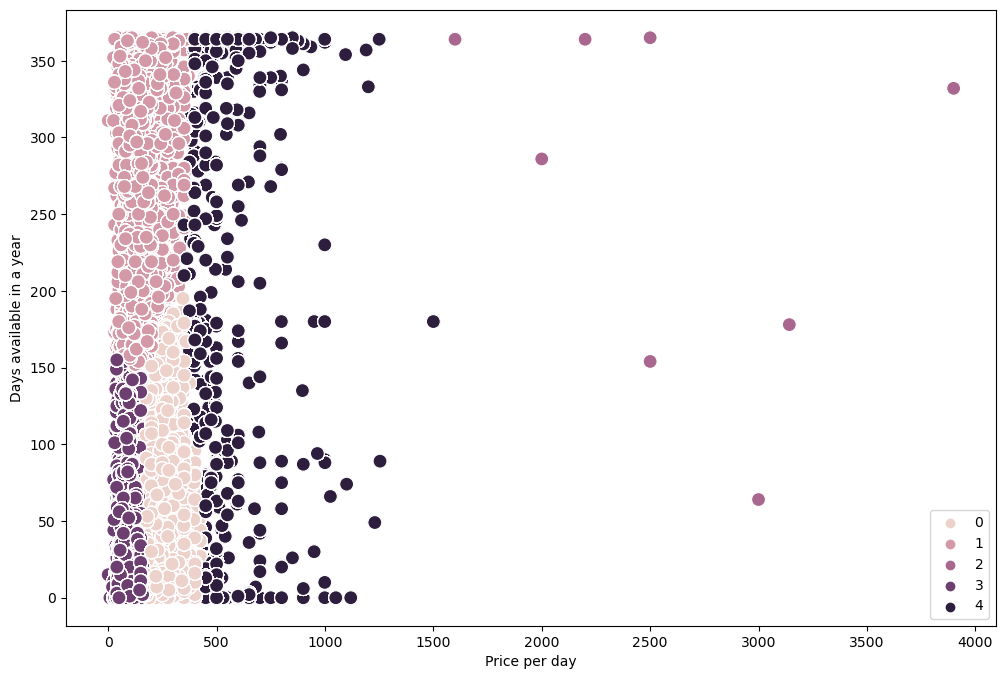

In [43]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Price_list'], y=df['Availability_365'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Days available in a year') 
plt.show()

In [41]:
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 4, 'cluster'] = 'black'

In [42]:
df.groupby('cluster').agg({'Price_list':['mean', 'median'], 
                         'Bedrooms':['mean', 'median'], 
                         'N_reviews':['mean', 'median'],
                          'N.People':['mean', 'median'],
                          'Availability_365':['mean', 'median']})

Price_list          Bedrooms         N_reviews         N.People  \
                    mean  median      mean median       mean median      mean   
cluster                                                                         
black         558.784444   500.0  2.868889    3.0  13.815556    5.0  5.360000   
dark purple   108.804390   109.0  1.230182    1.0  17.420807    8.0  2.532722   
light pink    230.188679   201.0  2.069836    2.0  13.071306    7.0  3.780446   
pink          148.434259   139.0  1.272666    1.0  51.577116   23.0  2.794580   
purple       2605.250000  2500.0  3.125000    3.0   2.500000    0.0  8.375000   

                   Availability_365         
            median             mean median  
cluster                                     
black          4.0       198.297778  180.5  
dark purple    2.0        15.147934    0.0  
light pink     4.0        25.078412    3.0  
pink           2.0       272.374707  285.0  
purple         7.0       263.375000  309.0

## Understading from the clusters -

Ligh pink,pink and dark purple are mixed price ranges and below 450/500 ranges. Black cluster shows between the range 500 to 1500 and purple shows over 1500
But houses with higher prices gets less ratings. May be because for the price paid, people expect more as well?
